# Encoder-Decoder Analysis

### Model Architecture

In [1]:
report_file = '/Users/bking/IdeaProjects/LanguageModelRNN/reports/encdec_250_800.json'
log_file = '/Users/bking/IdeaProjects/LanguageModelRNN/logs/encdec_250_800_logs.json'

import json
import matplotlib.pyplot as plt
with open(report_file) as f:
    report = json.loads(f.read())
with open(log_file) as f:
    logs = json.loads(f.read())
print'Encoder: \n\n', report['architecture']['encoder']
print'Decoder: \n\n', report['architecture']['decoder']

Encoder: 

nn.Sequential {
  [input -> (1) -> (2) -> output]
  (1): nn.LookupTable
  (2): nn.LSTM(250 -> 800)
}
Decoder: 

nn.gModule


### Perplexity on Each Dataset

In [2]:
print('Train Perplexity: ', report['train_perplexity'])
print('Valid Perplexity: ', report['valid_perplexity'])
print('Test Perplexity: ', report['test_perplexity'])

('Train Perplexity: ', 6.4398729601483)
('Valid Perplexity: ', 29.048134934015)
('Test Perplexity: ', 27.320529810014)


### Loss vs. Epoch

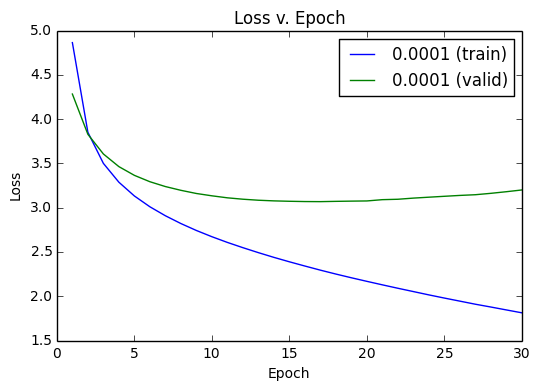

In [3]:
%matplotlib inline
for k in logs.keys():
    plt.plot(logs[k][0], logs[k][1], label=str(k) + ' (train)')
    plt.plot(logs[k][0], logs[k][2], label=str(k) + ' (valid)')
plt.title('Loss v. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Perplexity vs. Epoch

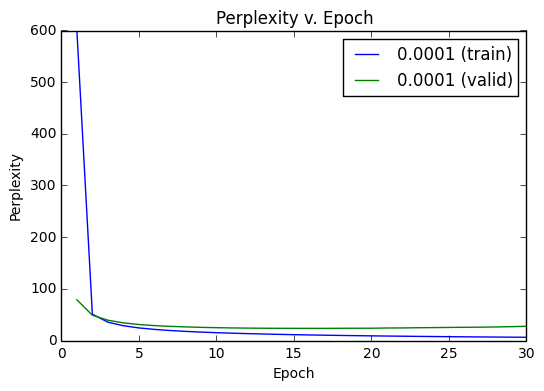

In [4]:
%matplotlib inline
for k in logs.keys():
    plt.plot(logs[k][0], logs[k][3], label=str(k) + ' (train)')
    plt.plot(logs[k][0], logs[k][4], label=str(k) + ' (valid)')
plt.title('Perplexity v. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Perplexity')
plt.legend()
plt.show()

### Generations

In [5]:
def print_sample(sample):
    enc_input = ' '.join([w for w in sample['encoder_input'].split(' ') if w != '<pad>'])
    gold = ' '.join([w for w in sample['gold'].split(' ') if w != '<mask>'])
    print('Input: '+ enc_input + '\n')
    print('Gend: ' + sample['generated'] + '\n')
    print('True: ' + gold + '\n')
    print('\n')
    

In [6]:
for sample in report['train_samples']:
    print_sample(sample)

Input:  easy cheesy tuna casserole <begin_ingredients> 1 ( 7 1 / 4 ounce ) package kraft macaroni & cheese dinner mix <ing> 1 / 4 cup butter ( not spread or tub product ) or 1 / 4 cup margarine ( not spread or tub product ) <ing> 1 / 4 cup butter ( not spread or tub product ) or 1 / 4 cup margarine ( not spread or tub product ) <ing> 1 / 4 cup milk <ing> 1 ( 10 3 / 4 ounce ) can condensed cream of celery soup <ing> 1 / 2 cup milk <ing> 1 ( 6 ounce ) canned tuna , drained <ing> 1 / 2 medium red pepper , chopped <ing> 2 green onions , sliced <ing> 1 cup crushed potato chip <end>

Gend:  <beg> preheat oven to 350 degrees f ( 175 degrees c ) . <step> in a large skillet over medium heat , cook ground beef and onion until tender . stir in the ground beef and onion ; cook , stirring occasionally , until browned , about 8 minutes . <step> stir in the tomatoes ,

True:  preheat oven to 350f ° <step> prepare the mac - n - cheese dinner according to package directions . <step> stir in soup , milk

In [7]:
for sample in report['valid_samples']:
    print_sample(sample)

Input:  spinach with chickpeas <begin_ingredients> 2 pounds baby spinach <ing> 3 tablespoons extra - virgin olive oil , divided <ing> 1 medium red onion , finely chopped <ing> 5 cloves garlic , minced <ing> 1 19 - ounce can chickpeas , rinsed <ing> 1 1 / 2 teaspoons dried thyme <ing> 1 1 / 2 teaspoons dried oregano <ing> 1 1 / 2 teaspoons ground cumin <ing> 1 teaspoon kosher salt <ing> 1 / 2 teaspoon hot paprika <ing> 1 / 2 cup golden raisins <ing> 1 / 2 cup reduced - sodium chicken broth , or vegetable broth <end>

Gend:  <beg> to make the sauce : in a small bowl , combine the soy sauce , garlic , brown sugar , and chili powder . <step> rub the mixture over the pork chops . <step> heat the oil in a large skillet over medium - high heat . cook the steaks for 5 minutes on each

True:  1 . rinse spinach and let drain in a colander . with water still clinging to it , place half the spinach in a dutch oven over medium heat . cook , tossing with tongs and adding the remaining spinach by the

In [8]:
for sample in report['test_samples']:
    print_sample(sample)

Input:  peanut butter jelly ice cream <begin_ingredients> 250ml ( 1 cup ) almond milk <ing> 4 tbsp smooth peanut butter <ing> 30g ( 1 / 4 cup ) ground almonds <ing> 1 tsp vanilla extract <ing> 3 tbsp maple syrup ( or raw honey if on a raw diet ) <ing> 150g ( 1 cup ) fresh strawberries , halved <ing> 2 tsp chia seeds <ing> 1 tbsp of maple syrup / honey , or more to taste <end>

Gend:  <beg> 1 . in a large bowl , combine the cake mix , oil , and water with the salt and mix well . <step> 2 . add the coconut oil and stir to combine . <step> 3 . pour the mixture into the prepared pan and bake for 20 minutes . <step> 8 . remove

True:  to make the jelly <step> simply blend the strawberries , sweetner and chia seeds together until thick and smooth . leave to the side for later . <step> to make the ice cream <step> mix all the ingredients in a blender until smooth . <step> pour the mixture into your ice cream maker and follow instructions . <step> once the ice cream has churned , transfer a th

### BLEU Analysis

In [9]:
print 'Overall Score: ', report['bleu']['score'], '\n'
print '1-gram Score: ', report['bleu']['components']['1']
print '2-gram Score: ', report['bleu']['components']['2']
print '3-gram Score: ', report['bleu']['components']['3']
print '4-gram Score: ', report['bleu']['components']['4']

Overall Score:  0.14 

1-gram Score:  43.8
2-gram Score:  14.7
3-gram Score:  6.8
4-gram Score:  3.6
